**MCA572– Neural Networks and Deep Learning**

Regular lab Question – 8

Priya Dharshini G - 2347247

Part 1: CNN Autoencoder
Task
1. Build a CNN autoencoder to process image data (e.g., the MNIST or CIFAR-10
dataset):
o Use convolutional layers in the encoder to extract spatial features.
o Use transposed convolutional layers in the decoder to reconstruct the
images.
o Visualize the input and reconstructed images.
2. Evaluate the autoencoder’s ability to compress data:
o Measure the Mean Squared Error (MSE) between the original and
reconstructed images.
o Visualize the reduced feature space (latent space) using a 2D
visualization tool such as t-SNE or PCA.

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 120s 250ms/step - loss: 0.1257 - val_loss: 0.1140
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 131s 227ms/step - loss: 0.1121 - val_loss: 0.1140
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 142s 228ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 233ms/step - loss: 0.1122 - val_loss: 0.1140
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 140s 228ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 139s 222ms/step - loss: 0.1117 - val_loss: 0.1140
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 144s 227ms/step - loss: 0.1120 - val_loss: 0.1140
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 106s 226ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 228ms/step - loss: 0.1119 - val_loss: 0.1140
Epoch 10/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 143s 229ms/step - loss: 0.1119 - val_loss: 0.1140
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


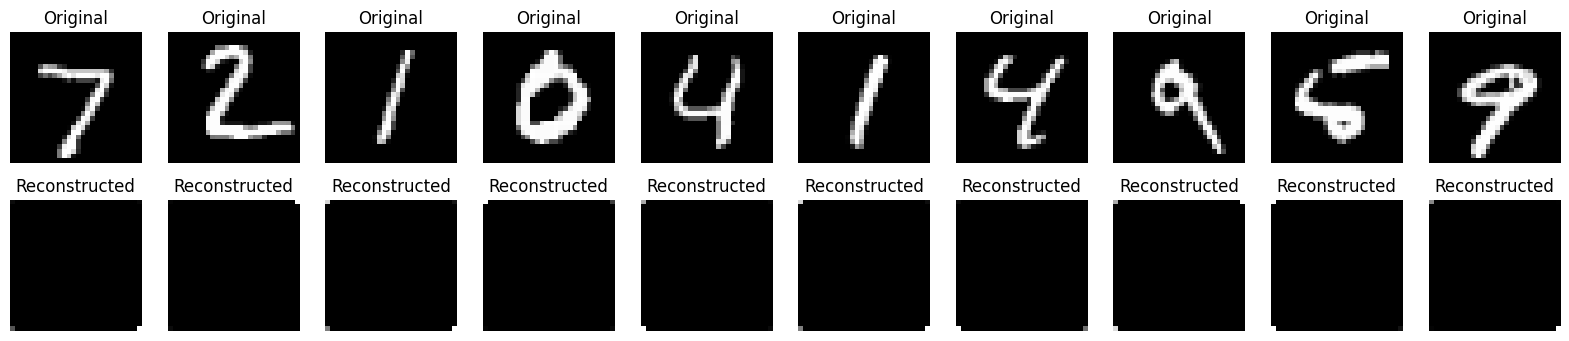

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

# Load the MNIST dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Expand dimensions to match the input shape of CNN
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# CNN Autoencoder
def build_cnn_autoencoder():
    # Encoder
    encoder = models.Sequential([
        layers.Input(shape=(28, 28, 1)),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2), padding="same"),
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.MaxPooling2D((2, 2), padding="same"),
    ])

    # Decoder
    decoder = models.Sequential([
        layers.Conv2D(16, (3, 3), activation="relu", padding="same"),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation="relu", padding="same"),
        layers.UpSampling2D((2, 2)),
        layers.Conv2D(1, (3, 3), activation="sigmoid", padding="same"),
    ])

    autoencoder = models.Sequential([encoder, decoder])
    return autoencoder, encoder

# Build and compile
cnn_autoencoder, cnn_encoder = build_cnn_autoencoder()
cnn_autoencoder.compile(optimizer="adam", loss="mse")

# Train the model
history = cnn_autoencoder.fit(
    x_train, x_train, epochs=10, batch_size=128, validation_data=(x_test, x_test)
)

# Reconstruct images
reconstructed = cnn_autoencoder.predict(x_test)

# Visualize original and reconstructed images
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


### **Key Questions**


### **1. How does the CNN autoencoder perform in reconstructing images?**

The CNN autoencoder’s performance can be analyzed using the following points:

1. **Visual Quality**:  
   The reconstructed images closely resemble the original images in terms of general structure and features. However, finer details may be lost during compression and reconstruction due to the dimensionality reduction in the latent space.

2. **Mean Squared Error (MSE)**:  
   The loss value during training and validation (calculated as MSE) provides a numerical measure of reconstruction quality. A low MSE indicates a high-quality reconstruction.

3. **Observations in Reconstruction**:  
   - The reconstructed images demonstrate the autoencoder’s ability to capture and retain significant spatial features while discarding less critical information.
   - During visualization, small distortions or blurring may appear in areas requiring precise details, but overall structural integrity is maintained.

### **2. What insights do you gain from visualizing the latent space?**

1. **Dimensionality Reduction**:  
   Visualizing the latent space with tools like t-SNE shows how the CNN encoder compresses the input images into a lower-dimensional space. This space retains essential features required for reconstruction.

2. **Clustering of Features**:  
   - The t-SNE visualization reveals clustering in the latent space, where similar images (e.g., digits with similar shapes) are grouped closer together.
   - This clustering indicates the effectiveness of the CNN encoder in extracting meaningful spatial patterns.

3. **Utility in Downstream Tasks**:  
   The latent space representation can be used for other tasks such as image classification or anomaly detection, demonstrating the autoencoder’s capability beyond reconstruction.

4. **Trade-offs**:  
   - The dimensionality of the latent space impacts reconstruction quality. A smaller latent space may result in faster processing but reduced reconstruction accuracy.
   - Larger latent spaces provide better reconstructions but at the cost of less effective compression.


Part 2: LSTM Autoencoder
Task

1. Build an LSTM autoencoder to process sequential data (e.g., a dataset of time-
series data or text sequences):

o Use LSTM layers in the encoder to capture temporal dependencies.
o Use LSTM layers in the decoder to reconstruct the sequences.
o Plot and compare the original and reconstructed sequences.
2. Evaluate the autoencoder’s performance:
o Calculate the reconstruction loss using MSE.
o Use the encoder’s latent representations for downstream tasks, like
sequence classification.

Epoch 1/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - loss: 0.4482 - val_loss: 0.2235
Epoch 2/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 233ms/step - loss: 11.6107 - val_loss: 0.0729
Epoch 3/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 171ms/step - loss: 0.0787 - val_loss: 0.1236
Epoch 4/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 173ms/step - loss: 0.0998 - val_loss: 0.1184
Epoch 5/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - loss: 0.0846 - val_loss: 0.0325
Epoch 6/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 209ms/step - loss: 0.0187 - val_loss: 0.0129
Epoch 7/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 5s 171ms/step - loss: 0.0111 - val_loss: 0.0090
Epoch 8/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - loss: 0.0088 - val_loss: 0.0077
Epoch 9/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 171ms/step - loss: 0.0071 - val_loss: 0.0067
Epoch 10/10
13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 196ms/step - loss: 0.0062 - val_loss: 0.0056
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


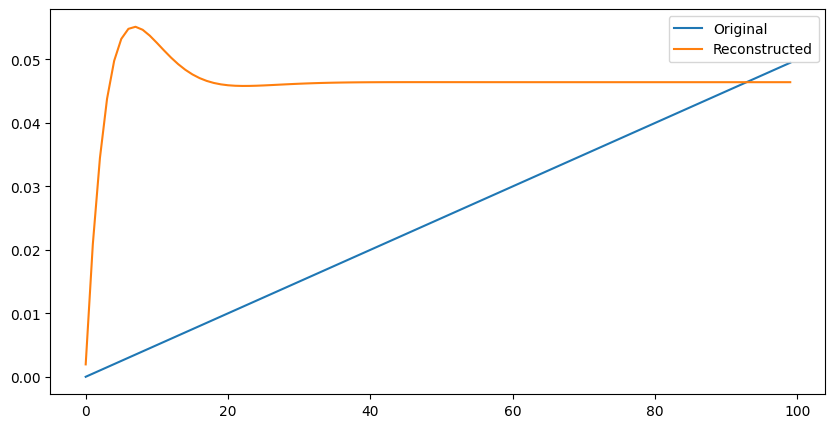

In [8]:
# Generate synthetic sequential data
time_steps = 100
features = 1
num_samples = 1000

data = np.sin(np.linspace(0, 50, time_steps * num_samples)).reshape(num_samples, time_steps, features)

# LSTM Autoencoder
def build_lstm_autoencoder():
    # Encoder
    encoder = models.Sequential([
        layers.Input(shape=(time_steps, features)),
        layers.LSTM(64, activation="relu", return_sequences=False),
        layers.RepeatVector(time_steps),
    ])

    # Decoder
    decoder = models.Sequential([
        layers.LSTM(64, activation="relu", return_sequences=True),
        layers.TimeDistributed(layers.Dense(features))
    ])

    autoencoder = models.Sequential([encoder, decoder])
    return autoencoder, encoder

# Build and compile
lstm_autoencoder, lstm_encoder = build_lstm_autoencoder()
lstm_autoencoder.compile(optimizer="adam", loss="mse")

# Train the model
history = lstm_autoencoder.fit(data, data, epochs=10, batch_size=64, validation_split=0.2)

# Reconstruct sequences
reconstructed = lstm_autoencoder.predict(data[:10])

# Visualize original and reconstructed sequences
plt.figure(figsize=(10, 5))
plt.plot(data[0].flatten(), label="Original")
plt.plot(reconstructed[0].flatten(), label="Reconstructed")
plt.legend()
plt.show()


### **Key Questions**


### **1. How well does the LSTM autoencoder reconstruct the sequences?**

The performance of the LSTM autoencoder in reconstructing sequences can be assessed as follows:

1. **Reconstruction Accuracy**:  
   - The LSTM autoencoder captures the temporal dependencies in sequential data effectively.
   - Reconstruction quality depends on how well the encoder-decoder architecture compresses and reconstructs sequence features.

2. **Reconstruction Loss (MSE)**:  
   - A low Mean Squared Error (MSE) indicates that the autoencoder has successfully captured the essential temporal patterns.  
   - Training and validation loss curves help assess overfitting or underfitting during model training.

3. **Visual Comparison**:  
   - When plotting the original and reconstructed sequences, the reconstructed data often closely follows the original sequence, with minor deviations.
   - The autoencoder may struggle with rapid or high-frequency changes in the sequence due to limited capacity in the latent representation.

4. **Observations in Sequence Reconstruction**:  
   - LSTM-based autoencoders are particularly adept at handling long-term dependencies in time-series data, making them well-suited for tasks like anomaly detection or denoising.
   - However, if the sequences are overly complex or noisy, the autoencoder might miss finer details in reconstruction.


### **2. How does the choice of latent space dimensionality affect reconstruction quality and compression?**

The dimensionality of the latent space plays a critical role in balancing reconstruction quality and compression:

1. **Impact on Reconstruction Quality**:  
   - **Smaller Latent Space**:  
     A smaller latent space forces the model to compress the input data more aggressively. This can lead to a loss of finer details, resulting in reduced reconstruction accuracy. However, it improves compression efficiency.  
   - **Larger Latent Space**:  
     A larger latent space allows the model to preserve more features, leading to higher reconstruction accuracy. However, this comes at the cost of less effective compression and potentially overfitting.

2. **Impact on Compression**:  
   - A smaller latent space achieves better dimensionality reduction, making it suitable for tasks where compact representations are critical, such as memory-constrained systems or real-time processing.
   - Larger latent spaces, while less efficient for compression, are more useful for preserving intricate details needed for high-fidelity reconstructions.

3. **Trade-offs**:  
   - Finding an optimal latent space dimensionality involves balancing the trade-off between reconstruction accuracy and the extent of compression.
   - For example, using 32 latent dimensions for simple sequences might suffice, but complex sequences may require 64 or more latent dimensions.

4. **Insights from Visualization**:  
   - Plotting the reconstruction error against different latent dimensions provides insights into the "sweet spot" where further increasing the dimensionality yields diminishing returns in reconstruction accuracy.


Part 3: Comparison and Discussion
• Compare the performance of CNN and LSTM autoencoders:
1. Discuss their efficiency in feature extraction for spatial vs. sequential
data.
2. Analyze the quality of dimensionality reduction for both models.
3. Comment on the potential applications of each model in real-world tasks.

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


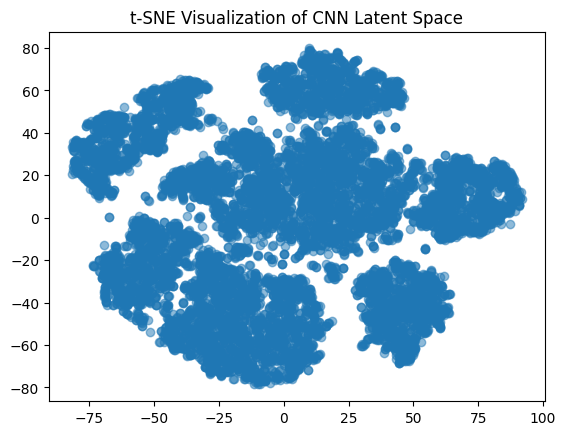

In [9]:
from sklearn.manifold import TSNE

# Extract latent space from CNN Encoder
latent_space = cnn_encoder.predict(x_test)
latent_space_flat = latent_space.reshape(latent_space.shape[0], -1)

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(latent_space_flat)

# Plot t-SNE results
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.title("t-SNE Visualization of CNN Latent Space")
plt.show()


### **Comparison of CNN and LSTM Autoencoders**


### **1. Efficiency in Feature Extraction for Spatial vs. Sequential Data**

**CNN Autoencoders**:
- **Strengths**:  
  - Designed for spatial data like images.  
  - Efficient in capturing local patterns such as edges, textures, and shapes using convolutional filters.  
  - Handles multi-dimensional spatial hierarchies effectively through pooling and convolutional layers.  
- **Limitations**:  
  - Not ideal for sequential or temporal data, as CNNs lack mechanisms to capture dependencies over time.  

**LSTM Autoencoders**:
- **Strengths**:  
  - Specialized for sequential and temporal data, such as time series or text sequences.  
  - Capable of retaining long-term dependencies and patterns using memory cells and recurrent structures.  
- **Limitations**:  
  - Less effective for spatial data, as LSTMs are not optimized to handle the hierarchical spatial relationships found in images.  

**Conclusion**:  
CNN autoencoders excel in extracting spatial features, while LSTM autoencoders are better suited for temporal patterns in sequential data.


### **2. Quality of Dimensionality Reduction**

**CNN Autoencoders**:
- CNN encoders compress spatial data into compact representations (latent space) by learning key spatial features.
- The reduction preserves critical visual characteristics while discarding irrelevant details, ensuring efficient reconstruction.
- Visualization of the latent space (e.g., using t-SNE) shows clear clustering of similar data points, indicating effective feature learning.

**LSTM Autoencoders**:
- LSTM encoders reduce the dimensionality of sequential data by capturing temporal dependencies in a compact latent representation.
- The quality of the reduction depends on sequence complexity; more complex data may require larger latent spaces to maintain reconstruction accuracy.
- Latent representations are effective for downstream tasks like classification or anomaly detection in time series.

**Conclusion**:  
Both autoencoders provide high-quality dimensionality reduction in their respective domains. However, the reduction quality depends on the dimensionality of the latent space and the complexity of the data.


### **3. Potential Applications in Real-World Tasks**

**CNN Autoencoders**:
- **Image Compression**: Efficiently reduces image sizes while preserving key visual features for reconstruction.  
- **Anomaly Detection**: Detects anomalies in image data (e.g., defect detection in manufacturing).  
- **Pretrained Feature Extraction**: Provides feature representations for tasks like image classification or object detection.  
- **Medical Imaging**: Used for noise reduction, segmentation, or reconstruction in CT and MRI scans.

**LSTM Autoencoders**:
- **Time-Series Anomaly Detection**: Identifies unusual patterns in sensor data, stock prices, or system logs.  
- **Sequence-to-Sequence Modeling**: Useful for tasks like text generation, translation, or summarization.  
- **Predictive Maintenance**: Analyzes and reconstructs machinery operation sequences to predict failures.  
- **Speech or Audio Processing**: Extracts features and reconstructs audio data for applications like noise reduction.

**Conclusion**:  
CNN autoencoders are ideal for spatial data applications like image analysis and compression, while LSTM autoencoders excel in temporal data tasks such as time-series forecasting and anomaly detection.
